In [1]:
import numpy as np
import pandas as pd 
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
with gzip.open("../00.data/preprocesado/meneame_procesado.pkl.gz", "rb") as f:
    df = pickle.load(f)

In [3]:
# df para clustering y modelos predictivos posteriores
df_clustering = df[['meneos', 'clicks', 'karma', 'positive_votes', 'negative_votes', 'anonymous_votes', 'comments', 'category']]

# df para ver KMeans y clustering
df_numeric = df[['meneos', 'clicks', 'karma', 'positive_votes', 'negative_votes', 'anonymous_votes', 'comments']]

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [5]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

Elbow  method : definir cuantos clusters necesitamos

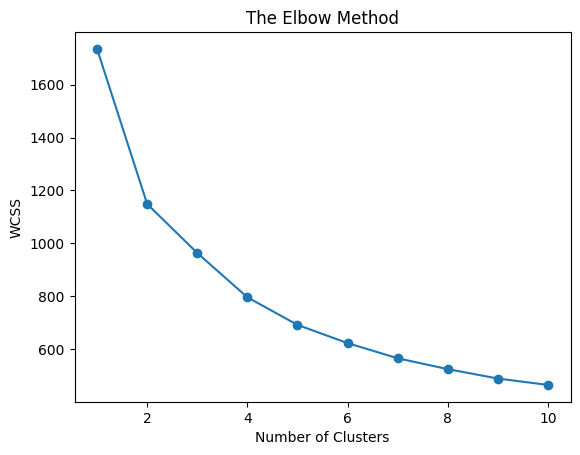

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

De este grafo mostrando within-cluster sum of squares por numero de clusters, elbow e ve aproximadamente en n_cluster = 3 o 4. Asi que ahora vamos a hacer KMeans con n=3 y con n=4

In [7]:
kmeans_3 = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=42)
labels_3 = kmeans_3.fit_predict(df_scaled)

kmeans_4 = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=42)
labels_4 = kmeans_4.fit_predict(df_scaled)

Ahora haciendo silhouette score para ver cual de los dos esta mejor (n=3 o n=4)

In [8]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for both cases
silhouette_3 = silhouette_score(df_scaled, labels_3)
silhouette_4 = silhouette_score(df_scaled, labels_4)

print(f"Silhouette Score for 3 Clusters: {silhouette_3:.3f}")
print(f"Silhouette Score for 4 Clusters: {silhouette_4:.3f}")

Silhouette Score for 3 Clusters: 0.484
Silhouette Score for 4 Clusters: 0.312


In [9]:
#elegir silhouette score que esta mas alta y eso seria numero de clusters
#hacer PCA para poder visualizar data en 2D porque no se puede hacerlo con 7 dimensiones

In [10]:
# KModes incluyendo categoría?

In [11]:
df_numeric["cluster_3"] = labels_3

C:\Users\Jordi\AppData\Local\Temp\ipykernel_23272\2977854352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["cluster_3"] = labels_3


In [12]:
df_numeric["cluster_3"].value_counts()

cluster_3
1    234320
2     44069
0      8966
Name: count, dtype: int64

In [13]:
df_numeric.groupby("cluster_3").mean()

,meneos,clicks,karma,positive_votes,negative_votes,anonymous_votes,comments
cluster_3,,,,,,,
0,666.980928,6479.970109,468.286192,260.755409,41.477805,406.225519,144.311845
1,378.445553,3076.243786,507.762782,172.538870,2.705569,205.906683,65.338264
2,1214.676780,4788.512288,546.536726,401.980077,5.498695,812.696703,107.882139


In [14]:
# cluster 0 es menos numeroso
# media mas alta de clicks, muchos anonymous_votes y comments, y el grupo con mayor votos negativos

# cluster 1 es el más numeroso
# menor número de meneos y clicks, karma medio, positive_votes y negative_votes más bajos, menor número de comentarios

# cluster 2
# meneos más alto, clicks medios, karma, positive_votes y anonymous_votes más altos, y bastantes comments

In [15]:
# Cluster 0 → Noticias polémicas o virales con gran interacción
# Cluster 0 parece representar noticias polémicas, generando muchos clicks, comentarios y votos negativos

# Cluster 1 → Noticias estándar, sin ser virales ni polémicas.
# Cluster 1 es el comportamiento estándar de la mayoría de las noticias

# Cluster 2 → Noticias muy populares en la comunidad con alto impacto
# Cluster 2 agrupa noticias muy populares en la comunidad, con muchos meneos y karma alto

In [16]:
df_clustering["cluster_3"] = labels_3

C:\Users\Jordi\AppData\Local\Temp\ipykernel_23272\2949659325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster_3"] = labels_3


In [17]:
cluster_names = {
    0: "Noticias polemicas",
    1: "Noticias estandar",
    2: "Noticias populares"
}

df_clustering["cluster_3_name"] = df_clustering["cluster_3"].map(cluster_names)

C:\Users\Jordi\AppData\Local\Temp\ipykernel_23272\77276023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster_3_name"] = df_clustering["cluster_3"].map(cluster_names)


In [18]:
df_clustering

,meneos,clicks,karma,positive_votes,negative_votes,anonymous_votes,comments,category,cluster_3,cluster_3_name
0,115,651,410,57,1,58,30,Política y Sociedad,1,Noticias estandar
1,77,982,362,50,2,27,24,Entretenimiento y Cultura,1,Noticias estandar
2,97,761,369,50,0,47,70,Política y Sociedad,1,Noticias estandar
3,141,505,352,77,1,64,53,Política y Sociedad,1,Noticias estandar
4,213,335,349,99,1,114,28,Política y Sociedad,1,Noticias estandar
...,...,...,...,...,...,...,...,...,...,...
287500,29,0,31,29,0,0,0,Otros,1,Noticias estandar
287501,18,0,22,18,0,0,0,Otros,1,Noticias estandar
287502,34,0,13,34,0,0,0,Otros,1,Noticias estandar
287503,61,0,11,61,0,0,5,Otros,1,Noticias estandar


category   Crimen  Cuestiones Sociales  Deportes  Educación  \
cluster_3                                                     
0             1.0                  6.0       NaN        1.0   
1            70.0                 56.0      13.0       18.0   
2             2.0                  7.0       NaN        NaN   

category   Entretenimiento y Cultura  Historia y Humanidades  Humor y Memes  \
cluster_3                                                                     
0                             1473.0                    28.0           26.0   
1                            37745.0                   223.0          207.0   
2                             1230.0                    43.0           12.0   

category   Medioambiente y Energía  Negocios y Economía     Otros  \
cluster_3                                                           
0                              2.0                  NaN    1760.0   
1                            195.0                 22.0  108071.0   
2           

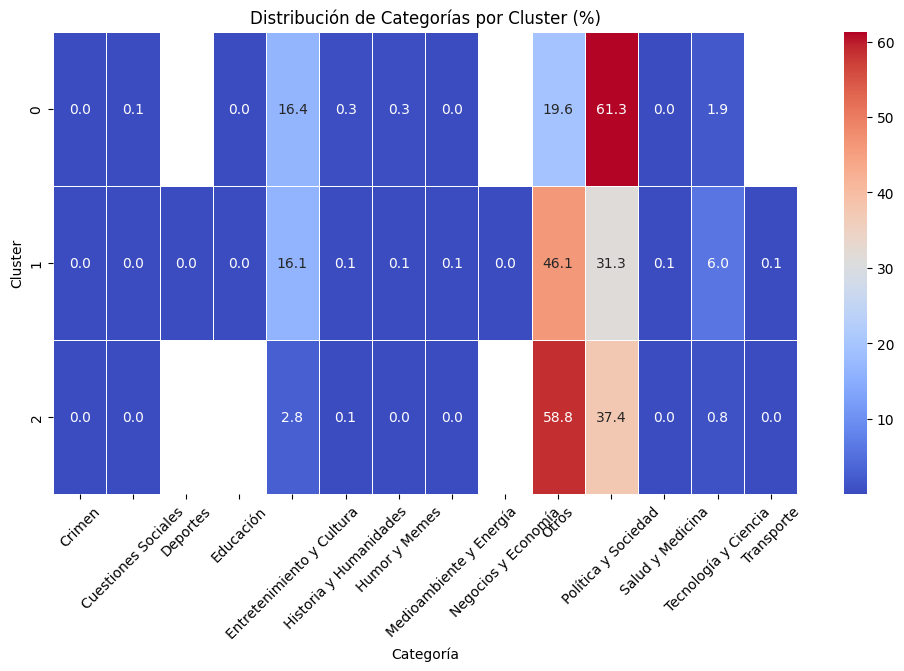

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar cuántas noticias de cada categoría hay en cada cluster
cluster_category_counts = df_numeric.join(df['category']).groupby(["cluster_3", "category"]).size().unstack()

# Mostrar tabla de conteos
print(cluster_category_counts)

# Normalizar por filas para ver proporciones en cada cluster
cluster_category_pct = cluster_category_counts.div(cluster_category_counts.sum(axis=1), axis=0) * 100

# 📊 Gráfico de calor para visualizar la distribución
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_category_pct, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Distribución de Categorías por Cluster (%)")
plt.ylabel("Cluster")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.show()

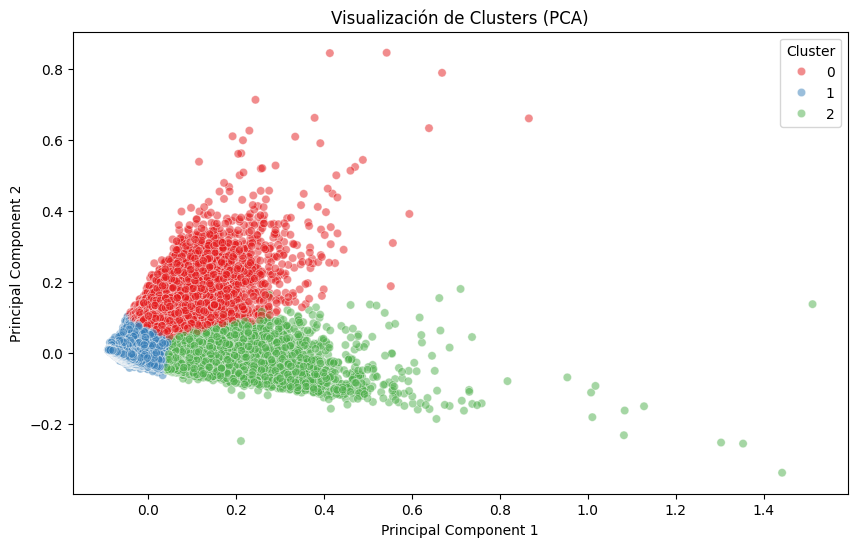

In [20]:
from sklearn.decomposition import PCA

# Reducimos a 2 dimensiones con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convertimos a DataFrame para graficar
df_plot = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_plot["Cluster"] = labels_3

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Cluster", palette="Set1", alpha=0.5)
plt.title("Visualización de Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
#####################################################

### WIP

In [ ]:
#####################################################

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
df_clustering.head()

In [ ]:
# Definir las variables
num_features = ['meneos', 'clicks', 'karma', 'positive_votes', 'anonymous_votes', 'negative_votes', 'comments']
cat_features = ['category']
target = 'cluster_3'

In [ ]:
# Separar features y target
X = df_clustering[num_features + cat_features]
y = df_clustering[target]

In [ ]:
# Preprocesamiento
scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', scaler, num_features),
    ('cat', encoder, cat_features)
])

In [ ]:
# Guardar el escalador
with open("../00.data/preprocesado/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
# Dividir en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Modelo base: Regresión Logística
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

In [ ]:
# Entrenar modelo
model.fit(X_train, y_train)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Definir variables
numeric_features = ['meneos', 'clicks', 'karma', 'positive_votes', 'negative_votes', 'anonymous_votes', 'comments']
categorical_features = ['category']

# Preprocesamiento: escalado numérico y OneHotEncoding de categorías
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Definir X e y
X = df_clustering.drop(columns=["cluster_3"])  # Variables predictoras
y = df_clustering["cluster_3"]  # Variable objetivo

# Dividir en Train/Test (estratificado para mantener proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

### 🔹 Opción 1: SMOTE + Random Forest
pipeline_smote = Pipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),  # Aumenta las clases minoritarias
    ("classifier", rf)
])

pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)

print("Resultados con SMOTE:")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

### 🔹 Opción 2: Undersampling + Random Forest
pipeline_under = Pipeline([
    ("preprocessor", preprocessor),
    ("undersample", RandomUnderSampler(random_state=42)),  # Reduce la clase mayoritaria
    ("classifier", rf)
])

pipeline_under.fit(X_train, y_train)
y_pred_under = pipeline_under.predict(X_test)

print("Resultados con Undersampling:")
print(classification_report(y_test, y_pred_under))
print(confusion_matrix(y_test, y_pred_under))
